In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn import cross_validation
from sklearn import tree
from sklearn import neighbors
from sklearn import svm
from sklearn import ensemble
from sklearn import cluster
from sklearn import model_selection

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns #for graphics and figure styling

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('FlightDelay2018.csv')

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data=data[1:50000]

In [6]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
1,2018,1,1,17,3,2018-01-17,AA,19805,AA,N128AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,1,1,18,4,2018-01-18,AA,19805,AA,N121AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,1,1,19,5,2018-01-19,AA,19805,AA,N129AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,1,1,20,6,2018-01-20,AA,19805,AA,N133AN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,1,1,21,7,2018-01-21,AA,19805,AA,N127AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 1 to 49999
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 42.0+ MB


In [8]:
data.DepDelayMinutes.fillna(1)

1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8         71.0
9          0.0
10         1.0
11         5.0
12         0.0
13         0.0
14         0.0
15         0.0
16        30.0
17        30.0
18        11.0
19         3.0
20         3.0
21        20.0
22        50.0
23         1.0
24         0.0
25         1.0
26         2.0
27         0.0
28         2.0
29         0.0
30        32.0
         ...  
49970      5.0
49971      0.0
49972      0.0
49973      1.0
49974      1.0
49975      1.0
49976      3.0
49977    180.0
49978     17.0
49979      0.0
49980      0.0
49981      0.0
49982      0.0
49983      1.0
49984      0.0
49985      0.0
49986     12.0
49987    306.0
49988      1.0
49989      0.0
49990     12.0
49991      0.0
49992      0.0
49993      0.0
49994      1.0
49995      0.0
49996      4.0
49997     17.0
49998      0.0
49999      0.0
Name: DepDelayMinutes, Length: 49999, dtype: float64

In [9]:
data.fillna(1)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
1,2018,1,1,17,3,2018-01-17,AA,19805,AA,N128AN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2018,1,1,18,4,2018-01-18,AA,19805,AA,N121AN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2018,1,1,19,5,2018-01-19,AA,19805,AA,N129AA,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2018,1,1,20,6,2018-01-20,AA,19805,AA,N133AN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2018,1,1,21,7,2018-01-21,AA,19805,AA,N127AA,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,2018,1,1,22,1,2018-01-22,AA,19805,AA,N130AN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2018,1,1,23,2,2018-01-23,AA,19805,AA,N131NN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,2018,1,1,24,3,2018-01-24,AA,19805,AA,N131NN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,2018,1,1,25,4,2018-01-25,AA,19805,AA,N132AN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,2018,1,1,26,5,2018-01-26,AA,19805,AA,N131NN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
data.DepDelayMinutes[data.DepDelayMinutes!=0]=1

In [11]:
from collections import defaultdict
a=0
b=0
missing=defaultdict(int)
for col in data:
    for i in data[col].isnull():
        if i:
            a+=1
        b+=1
    print('Missing data in',col,'is',a/b*100,'%')
    missing[col]=a/b*100
    a=0
    b=0
missing['Year']

Missing data in Year is 0.0 %
Missing data in Quarter is 0.0 %
Missing data in Month is 0.0 %
Missing data in DayofMonth is 0.0 %
Missing data in DayOfWeek is 0.0 %
Missing data in FlightDate is 0.0 %
Missing data in UniqueCarrier is 0.0 %
Missing data in AirlineID is 0.0 %
Missing data in Carrier is 0.0 %
Missing data in TailNum is 0.0 %
Missing data in FlightNum is 0.0 %
Missing data in OriginAirportID is 0.0 %
Missing data in OriginAirportSeqID is 0.0 %
Missing data in OriginCityMarketID is 0.0 %
Missing data in Origin is 0.0 %
Missing data in OriginCityName is 0.0 %
Missing data in OriginState is 0.0 %
Missing data in OriginStateFips is 0.0 %
Missing data in OriginStateName is 0.0 %
Missing data in OriginWac is 0.0 %
Missing data in DestAirportID is 0.0 %
Missing data in DestAirportSeqID is 0.0 %
Missing data in DestCityMarketID is 0.0 %
Missing data in Dest is 0.0 %
Missing data in DestCityName is 0.0 %
Missing data in DestState is 0.0 %
Missing data in DestStateFips is 0.0 %
Miss

0.0

In [12]:
for col in data:
    if missing[col]>5:
        data=data.drop(col, axis=1)

In [13]:
data=data.drop('TailNum',axis=1)

In [14]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,FlightNum,...,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
1,2018,1,1,17,3,2018-01-17,AA,19805,AA,228,...,0001-0559,0.0,0.0,378.0,350.0,327.0,1.0,2556.0,11,0
2,2018,1,1,18,4,2018-01-18,AA,19805,AA,228,...,0001-0559,0.0,0.0,378.0,364.0,344.0,1.0,2556.0,11,0
3,2018,1,1,19,5,2018-01-19,AA,19805,AA,228,...,0001-0559,0.0,0.0,378.0,345.0,325.0,1.0,2556.0,11,0
4,2018,1,1,20,6,2018-01-20,AA,19805,AA,228,...,0001-0559,0.0,0.0,378.0,356.0,334.0,1.0,2556.0,11,0
5,2018,1,1,21,7,2018-01-21,AA,19805,AA,228,...,0001-0559,0.0,0.0,378.0,362.0,341.0,1.0,2556.0,11,0


In [16]:
data['DepDelayMinutes']

1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        1.0
9        0.0
10       1.0
11       1.0
12       0.0
13       0.0
14       0.0
15       0.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       0.0
25       1.0
26       1.0
27       0.0
28       1.0
29       0.0
30       1.0
        ... 
49970    1.0
49971    0.0
49972    0.0
49973    1.0
49974    1.0
49975    1.0
49976    1.0
49977    1.0
49978    1.0
49979    0.0
49980    0.0
49981    0.0
49982    0.0
49983    1.0
49984    0.0
49985    0.0
49986    1.0
49987    1.0
49988    1.0
49989    0.0
49990    1.0
49991    0.0
49992    0.0
49993    0.0
49994    1.0
49995    0.0
49996    1.0
49997    1.0
49998    0.0
49999    0.0
Name: DepDelayMinutes, Length: 49999, dtype: float64

In [17]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [18]:
data = data.apply(LabelEncoder().fit_transform)

In [19]:
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,FlightNum,...,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,DivAirportLandings
1,0,0,0,16,2,16,0,0,0,0,...,0,0,0,320,308,303,0,280,10,0
2,0,0,0,17,3,17,0,0,0,0,...,0,0,0,320,322,320,0,280,10,0
3,0,0,0,18,4,18,0,0,0,0,...,0,0,0,320,303,301,0,280,10,0
4,0,0,0,19,5,19,0,0,0,0,...,0,0,0,320,314,310,0,280,10,0
5,0,0,0,20,6,20,0,0,0,0,...,0,0,0,320,320,317,0,280,10,0


In [20]:
depDelayColumn = data.DepDelayMinutes

In [21]:
depDelayColumn.head()

1    0
2    0
3    0
4    0
5    0
Name: DepDelayMinutes, dtype: int64

In [22]:
data = data.drop('DepDelayMinutes', axis=1)

In [23]:
data = data.drop('DepDelay', axis=1)

In [40]:
data = data.drop(['CRSDepTime','DepTime','DepartureDelayGroups'], axis=1)

In [41]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(data, depDelayColumn, test_size=.3)

In [42]:
y_test

34505    0
18500    0
17321    0
14040    0
10854    0
43551    0
32795    0
12088    1
20375    0
858      1
45431    1
34909    1
9463     0
32402    0
18425    1
47924    1
5213     0
46989    0
11688    1
9758     0
22016    1
48063    1
18652    0
30146    1
926      1
15421    1
34297    0
3670     0
16477    1
40412    1
        ..
43616    1
4088     0
42440    1
26532    0
22354    0
10844    1
37368    1
19338    0
16814    1
25339    0
5485     0
46425    0
46062    0
49104    1
21804    1
34685    1
7039     1
13617    0
31303    0
47210    1
42574    0
41315    0
24701    0
10080    0
11869    1
31336    0
26273    0
36294    0
43880    0
17789    0
Name: DepDelayMinutes, Length: 15000, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
censusIDM = RandomForestClassifier(max_depth=15, random_state=0)
#from sklearn.feature_selection import RFE
#rfe = RFE(censusIDM, n_features_to_select=20)
censusIDM.fit(data_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
predict_TestOutput=censusIDM.predict(data_test)
predictOutput=censusIDM.predict(data_train)
goodTest=(predict_TestOutput==y_test).sum();print(goodTest)
good=(predictOutput==y_train).sum();print(good)
badTest=(predict_TestOutput!=y_test).sum();print(badTest)
bad=(predictOutput!=y_train).sum();print(bad)

12836
32546
2164
2453


/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

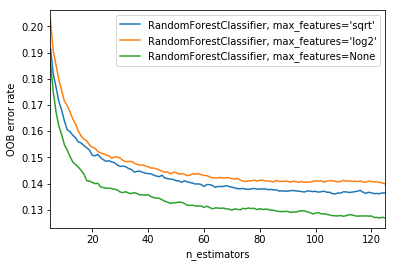

In [51]:
#Running The Random Forest OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 125

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(data_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

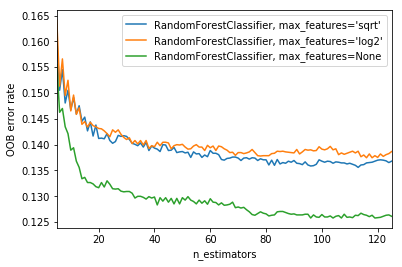

In [52]:
#Running The Random Forest Test Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 125

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(data_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(data_test)
        test_errorCLF = (1 - sum(y_pred == y_test)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

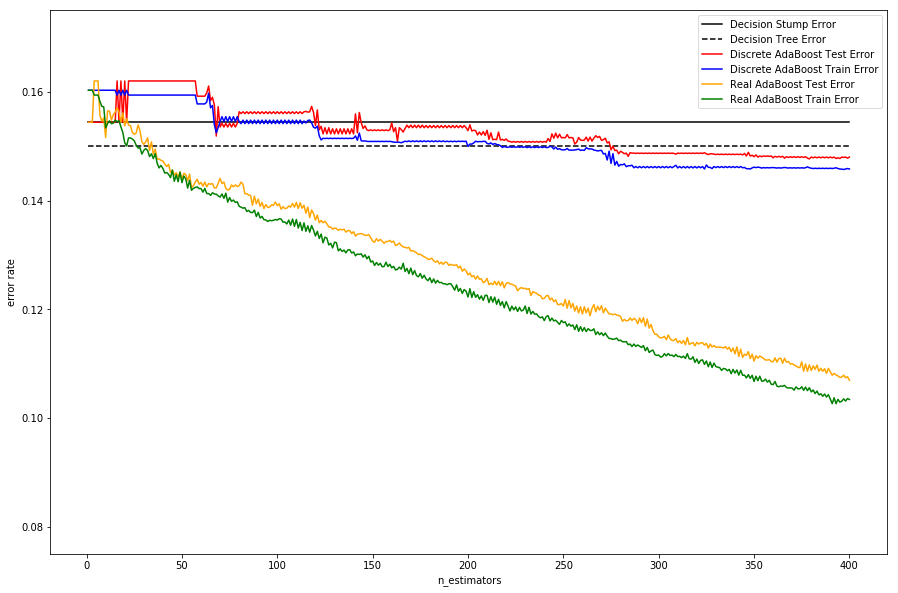

In [53]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss
from sklearn.ensemble import AdaBoostClassifier
n_estimators = 400
# A learning rate of 1. may not be optimal for both SAMME and SAMME.R
learning_rate = 1.
dt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(data_train, y_train)
dt_err = 1.0 - dt.score(data_test, y_test)
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(data_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(data_test, y_test)
ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=learning_rate,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(data_train, y_train)
ada_real.fit(data_train, y_train)
fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(data_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(data_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(data_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(data_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.075, 0.175))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()
fig.savefig("ada.pdf", bbox_inches='tight')

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

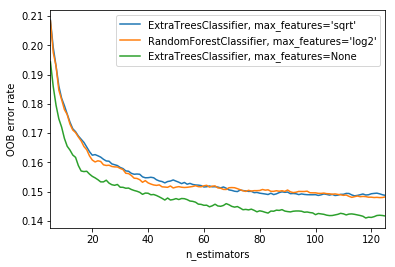

In [54]:
#Running The Extra Trees OOB Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 125

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(data_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/SandeepGuru/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:

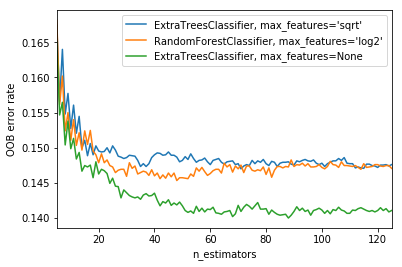

In [55]:
#Running The Extra Trees Test Error Rate Chart
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
RANDOM_STATE = 123
ensemble_clfs = [
    ("ExtraTreesClassifier, max_features='sqrt'",
        ExtraTreesClassifier(warm_start=True, max_features='sqrt',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        ExtraTreesClassifier(warm_start=True, max_features='log2',
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE)),
    ("ExtraTreesClassifier, max_features=None",
        ExtraTreesClassifier(warm_start=True, max_features=None,
                               oob_score=True, bootstrap=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 125

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(data_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        y_pred = clf.predict(data_test)
        test_errorCLF = (1 - sum(y_pred == y_test)/len(y_pred))
        error_rate[label].append((i, test_errorCLF))

# Generate the "OOB error rate" vs. "n_estimators" plot.
xss=[0]*3
yss=[0]*3
i=0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    xss[i]=xs
    yss[i]=ys
    i=i+1
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()